# **BDS Exercise 1: PySpark RDD Operations**

Lecturer: `Sirasit Lochanachit`

Course: `06026213 Big Data Systems`

Term: `02/2024`

Exercise prepared by `Duangkamon Phobsungnoen (TA)`

1. ติดตั้ง pySpark

In [1]:
!pip install pyspark

2. ให้สร้างตารางข้อมูลเมนูสำหรับร้านก๋วยเตี๋ยว ซึ่งจะประกอบไปด้วย 10 เมนูยอดนิยม โดยให้ข้อมูลในตารางประกอบด้วยคอลัมน์ต่างๆ ดังนี้
*   **menu_id**: รหัสเมนู
*   **menu_name**: ชื่อเมนู
*   **price**: ราคาของเมนู
*   **stock_quantity**: จำนวนก๋วยเตี๋ยวที่มีในสต็อก
*   **quantity_sold**: จำนวนที่ขายไปแล้ว

โดยชุดข้อมูลที่ใส่จะมีข้อตามรูปภาพตัวอย่าง

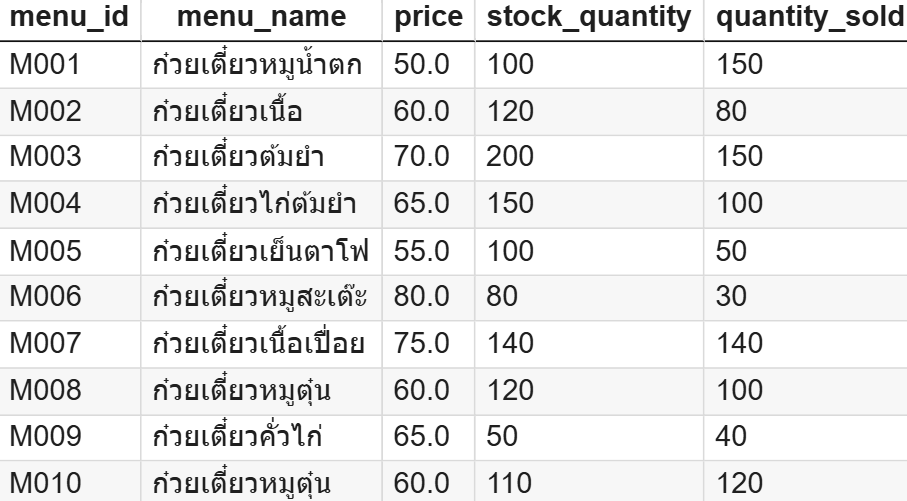

**เงื่อนไข**: เก็บข้อมูลทั้งหมดในไฟล์ CSV ทำการจัดเรียงข้อมูลในไฟล์ CSV ให้ถูกต้อง เมื่อทำสำเร็จให้คืนค่าชื่อไฟล์ filename เพื่อให้สามารถตรวจสอบได้ว่าไฟล์ถูกสร้างสำเร็จ

In [10]:
import pandas as pd

df = pd.DataFrame({
    'menu_id': ['M001','M002','M003','M004','M005','M006','M007','M008','M009','M010'],
    'menu_name': ['ก๋วยเตี๋ยวหมูน้ำตก','ก๋วยเตี๋ยวเนื้อต้มยำ','ก๋วยเตี๋ยวต้มยำ','ก๋วยเตี๋ยวไก่ต้มยำ','ก๋วยเตี๋ยวเย็นตาโฟ','ก๋วยเตี๋ยวหมูสะเต๊ะ','ก๋วยเตี๋ยวเนื้อเปื่อย','ก๋วยเตี๋ยวหมูตุ๋น','ก๋วยเตี๋ยวคั่วไก่','ก๋วยเตี๋ยวหมูตุ๋น'],
    'price': [50.0,60.0,70.0,65.0,55.0,80.0,75.0,60.0,65.0,60.0],
    'stock_quantity': [100,120,200,150,100,80,140,120,50,110],
    'quantity_sold': [150,80,150,100,50,30,140,100,40,120],
})
df

,menu_id,menu_name,price,stock_quantity,quantity_sold
0,M001,ก๋วยเตี๋ยวหมูน้ำตก,50.0,100,150
1,M002,ก๋วยเตี๋ยวเนื้อต้มยำ,60.0,120,80
2,M003,ก๋วยเตี๋ยวต้มยำ,70.0,200,150
3,M004,ก๋วยเตี๋ยวไก่ต้มยำ,65.0,150,100
4,M005,ก๋วยเตี๋ยวเย็นตาโฟ,55.0,100,50
5,M006,ก๋วยเตี๋ยวหมูสะเต๊ะ,80.0,80,30
6,M007,ก๋วยเตี๋ยวเนื้อเปื่อย,75.0,140,140
7,M008,ก๋วยเตี๋ยวหมูตุ๋น,60.0,120,100
8,M009,ก๋วยเตี๋ยวคั่วไก่,65.0,50,40
9,M010,ก๋วยเตี๋ยวหมูตุ๋น,60.0,110,120


In [11]:
df.to_csv("menu_sales.csv",index=False)

File /content/menu_sales.csv has been created.


3. สร้าง SparkSession

In [30]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Lab 1").getOrCreate()
spark

4. ให้สร้าง sparkContext และ โหลดข้อมูล CSV เป็น RDD โดยใช้ textFile()

In [12]:
sc = spark.sparkContext
filename = "menu_sales.csv"

rdd = sc.textFile(filename)
rdd.take(5)

['menu_id,menu_name,price,stock_quantity,quantity_sold',
 'M001,ก๋วยเตี๋ยวหมูน้ำตก,50.0,100,150',
 'M002,ก๋วยเตี๋ยวเนื้อต้มยำ,60.0,120,80',
 'M003,ก๋วยเตี๋ยวต้มยำ,70.0,200,150',
 'M004,ก๋วยเตี๋ยวไก่ต้มยำ,65.0,150,100']

5. ข้ามแถวแรก (Header) และแยกข้อมูลแต่ละแถว

In [16]:
header = rdd.first()
data_rdd = rdd.filter(lambda row: row != header)

data_rdd.take(5)

['M001,ก๋วยเตี๋ยวหมูน้ำตก,50.0,100,150',
 'M002,ก๋วยเตี๋ยวเนื้อต้มยำ,60.0,120,80',
 'M003,ก๋วยเตี๋ยวต้มยำ,70.0,200,150',
 'M004,ก๋วยเตี๋ยวไก่ต้มยำ,65.0,150,100',
 'M005,ก๋วยเตี๋ยวเย็นตาโฟ,55.0,100,50']

6. ให้แยกข้อมูลแต่ละแถวตามเครื่องหมาย ',' (comma) และแสดงผลข้อมูลทั้งหมด

In [49]:
split_rdd = data_rdd.map(lambda row: row.split(','))

for row in split_rdd.collect():
    print(row)

['M001', 'ก๋วยเตี๋ยวหมูน้ำตก', '50.0', '100', '150']
['M002', 'ก๋วยเตี๋ยวเนื้อต้มยำ', '60.0', '120', '80']
['M003', 'ก๋วยเตี๋ยวต้มยำ', '70.0', '200', '150']
['M004', 'ก๋วยเตี๋ยวไก่ต้มยำ', '65.0', '150', '100']
['M005', 'ก๋วยเตี๋ยวเย็นตาโฟ', '55.0', '100', '50']
['M006', 'ก๋วยเตี๋ยวหมูสะเต๊ะ', '80.0', '80', '30']
['M007', 'ก๋วยเตี๋ยวเนื้อเปื่อย', '75.0', '140', '140']
['M008', 'ก๋วยเตี๋ยวหมูตุ๋น', '60.0', '120', '100']
['M009', 'ก๋วยเตี๋ยวคั่วไก่', '65.0', '50', '40']
['M010', 'ก๋วยเตี๋ยวหมูตุ๋น', '60.0', '110', '120']


['M001', 'ก๋วยเตี๋ยวหมูน้ำตก', '50.0', '100', '150']
['M002', 'ก๋วยเตี๋ยวเนื้อ', '60.0', '120', '80']
['M003', 'ก๋วยเตี๋ยวต้มยำ', '70.0', '200', '150']
['M004', 'ก๋วยเตี๋ยวไก่ต้มยำ', '65.0', '150', '100']
['M005', 'ก๋วยเตี๋ยวเย็นตาโฟ', '55.0', '100', '50']
['M006', 'ก๋วยเตี๋ยวหมูสะเต๊ะ', '80.0', '80', '30']
['M007', 'ก๋วยเตี๋ยวเนื้อเปื่อย', '75.0', '140', '140']
['M008', 'ก๋วยเตี๋ยวหมูตุ๋น', '60.0', '120', '100']
['M009', 'ก๋วยเตี๋ยวคั่วไก่', '65.0', '50', '40']
['M010', 'ก๋วยเตี๋ยวหมูตุ๋น', '60.0', '110', '120']


(( ตัวอย่างคำตอบที่ต้องการข้อ 6 ))

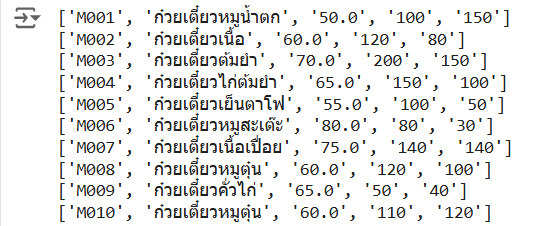

7. ให้แปลงข้อมูลเป็นรูปแบบ (menu_id, total_sales) และแสดงผลข้อมูลทั้งหมด (ห้ามใช้ reduceByKey)

  เ**พิ่มเติม** total_sales หมายถึง ผลรวมของ quantity_sold

In [50]:
split_rdd = split_rdd.map(lambda row: [row[0], row[1], float(row[2]), int(row[3]), int(row[4])])
split_rdd.take(1)

[['M001', 'ก๋วยเตี๋ยวหมูน้ำตก', 50.0, 100, 150]]

In [51]:
result_rdd = split_rdd.map(lambda row: (row[0], row[2] * row[-1]))

for row in result_rdd.collect():
    print(row)

('M001', 7500.0)
('M002', 4800.0)
('M003', 10500.0)
('M004', 6500.0)
('M005', 2750.0)
('M006', 2400.0)
('M007', 10500.0)
('M008', 6000.0)
('M009', 2600.0)
('M010', 7200.0)


('M001', 7500.0)
('M002', 4800.0)
('M003', 10500.0)
('M004', 6500.0)
('M005', 2750.0)
('M006', 2400.0)
('M007', 10500.0)
('M008', 6000.0)
('M009', 2600.0)
('M010', 7200.0)


(( ตัวอย่างคำตอบที่ต้องการข้อ 7 ))

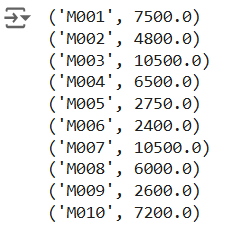

8. คำนวณยอดขายรวมตามเมนู โดยใช้ reduceByKey และมีการจัดเรียงผลลัพธ์จากมากไปน้อยตามยอดขายรวม จากนั้นแสดงผลข้อมูลทั้งหมด

In [58]:
from operator import add

result_rdd = result_rdd.reduceByKey(add)
result_rdd.collect()

[('M001', 7500.0),
 ('M002', 4800.0),
 ('M003', 10500.0),
 ('M004', 6500.0),
 ('M005', 2750.0),
 ('M006', 2400.0),
 ('M010', 7200.0),
 ('M007', 10500.0),
 ('M008', 6000.0),
 ('M009', 2600.0)]

In [62]:
result_rdd = result_rdd.sortBy(lambda x: x[1], ascending=False)

for row in result_rdd.collect():
    print(f'Menu ID: {row[0]}, Total Sales: {row[1]:.2f}')

Menu ID: M003, Total Sales: 10500.00
Menu ID: M007, Total Sales: 10500.00
Menu ID: M001, Total Sales: 7500.00
Menu ID: M010, Total Sales: 7200.00
Menu ID: M004, Total Sales: 6500.00
Menu ID: M008, Total Sales: 6000.00
Menu ID: M002, Total Sales: 4800.00
Menu ID: M005, Total Sales: 2750.00
Menu ID: M009, Total Sales: 2600.00
Menu ID: M006, Total Sales: 2400.00


Menu ID: M003, Total Sales: 10500.00
Menu ID: M007, Total Sales: 10500.00
Menu ID: M001, Total Sales: 7500.00
Menu ID: M010, Total Sales: 7200.00
Menu ID: M004, Total Sales: 6500.00
Menu ID: M008, Total Sales: 6000.00
Menu ID: M002, Total Sales: 4800.00
Menu ID: M005, Total Sales: 2750.00
Menu ID: M009, Total Sales: 2600.00
Menu ID: M006, Total Sales: 2400.00


(( ตัวอย่างคำตอบที่ต้องการข้อ 8 ))

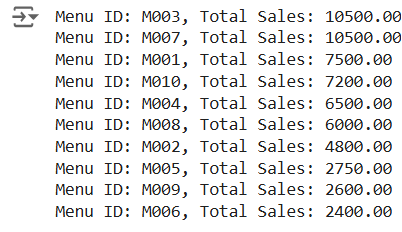

9. แสดงผลลัพธ์ของยอดขายที่ดีที่สุด 3 อันดับแรก

In [64]:
print('Get 3 Sales:',result_rdd.take(3))

Get 3 Sales: [('M003', 10500.0), ('M007', 10500.0), ('M001', 7500.0)]


Get 3 Sales: [('M003', 10500.0), ('M007', 10500.0), ('M001', 7500.0)]


(( ตัวอย่างคำตอบที่ต้องการข้อ 9 ))

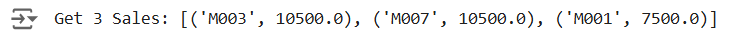